## Custom strategy

The idea of this strategy is mainly based around bollinger bands. To split it into more concrete steps

1. Calculate bollinger bands at each candle step and store it back as a context variable

2. When price at a point dips below a loweer bollinger band:

    a. Look for the next upward trend (first candle that closes higher than open)
    b. Improve this by consider 1 only if slope between the two candles in context is > 45 degrees
    
3. Simulate this simple strategy over a year of data and look at portfolio values and other metrics.

In [16]:
%load_ext catalyst
%matplotlib inline

The catalyst extension is already loaded. To reload it, use:
  %reload_ext catalyst


In [38]:
from catalyst.api import order, symbol, record, get_open_orders
from catalyst.utils.run_algo import run_algorithm
from stockstats import StockDataFrame

Running in backtesting mode.


[2018-03-11 03:38:57.668207] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2018-03-11 03:39:00.671297] INFO: run_algo: running algo in backtest mode
[2018-03-11 03:39:00.768311] WARNING: Loader: Refusing to download new treasury data because a download succeeded at 2018-03-04 23:49:57.381141+00:00.
[2018-03-11 03:39:00.772547] INFO: exchange_algorithm: initialized trading algorithm in backtest mode
[2018-03-11 03:39:01.066566] WARNING: exchange_blotter: skipping 0 amount orders
[2018-03-11 03:39:01.087224] WARNING: exchange_blotter: skipping 0 amount orders
[2018-03-11 03:39:01.110498] WARNING: exchange_blotter: skipping 0 amount orders
[2018-03-11 03:39:01.140171] WARNING: exchange_blotter: skipping 0 amount orders
[2018-03-11 03:39:01.158925] WARNING: exchange_blotter: skipping 0 amount orders
[2018

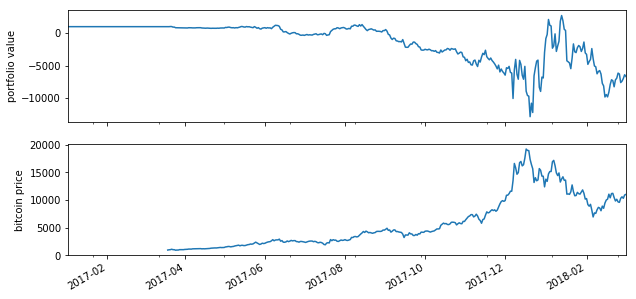

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,btc,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-01-01 23:59:00+00:00,NaN,0.000000,NaN,0.033531,NaN,NaN,NaN,0.000000,1000.000000,0.000000,...,0.000000,0.000000,0,NaN,1000.000000,0.000000,0.000000,1,[],0.0245
2017-01-02 23:59:00+00:00,0.000000,0.000000,0.000000,0.054543,0.148170,0.000000,NaN,0.000000,1000.000000,0.000000,...,0.000000,0.000000,0,NaN,1000.000000,0.000000,0.000000,2,[],0.0245
2017-01-03 23:59:00+00:00,0.000000,0.000000,0.000000,0.073372,0.133774,0.000000,NaN,0.000000,1000.000000,0.000000,...,0.000000,0.000000,0,NaN,1000.000000,0.000000,0.000000,3,[],0.0245
2017-01-04 23:59:00+00:00,0.000000,0.000000,0.000000,0.179002,0.601361,0.000000,NaN,0.000000,1000.000000,0.000000,...,0.000000,0.000000,0,NaN,1000.000000,0.000000,0.000000,4,[],0.0246
2017-01-05 23:59:00+00:00,0.000000,0.000000,0.000000,0.037886,1.263947,0.000000,NaN,0.000000,1000.000000,0.000000,...,0.000000,0.000000,0,NaN,1000.000000,0.000000,0.000000,5,[],0.0237
2017-01-06 23:59:00+00:00,0.000000,0.000000,0.000000,-0.070434,1.352120,0.000000,NaN,0.000000,1000.000000,0.000000,...,0.000000,0.000000,0,NaN,1000.000000,0.000000,0.000000,6,[],0.0242
2017-01-07 23:59:00+00:00,0.000000,0.000000,0.000000,-0.060605,1.239879,0.000000,NaN,0.000000,1000.000000,0.000000,...,0.000000,0.000000,0,NaN,1000.000000,0.000000,0.000000,7,[],0.0242
2017-01-08 23:59:00+00:00,0.000000,0.000000,0.000000,-0.052432,1.150945,0.000000,NaN,0.000000,1000.000000,0.000000,...,0.000000,0.000000,0,NaN,1000.000000,0.000000,0.000000,8,[],0.0242
2017-01-09 23:59:00+00:00,0.000000,0.000000,0.000000,-0.065778,1.077846,0.000000,NaN,0.000000,1000.000000,0.000000,...,0.000000,0.000000,0,NaN,1000.000000,0.000000,0.000000,9,[],0.0238
2017-01-10 23:59:00+00:00,0.000000,0.000000,0.000000,-0.062923,1.017093,0.000000,NaN,0.000000,1000.000000,0.000000,...,0.000000,0.000000,0,NaN,1000.000000,0.000000,0.000000,10,[],0.0238


In [61]:
%%catalyst -x bitfinex --start 2017-1-1 --end 2018-3-2 -c usd --capital-base 1000 -o out.pickle

from catalyst.api import order, symbol, record, get_open_orders, order_target_percent
from catalyst.utils.run_algo import run_algorithm
from stockstats import StockDataFrame
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

def initialize(context):
    """
    Initialize the required parameters
    """
    context.ASSET_NAME = 'btc_usd'
    context.asset = symbol(context.ASSET_NAME)
    context.i = 0    
    context.bollinger_periods = 20
    context.bollinger_lower_breakout = False
    context.bollinger_upper_breakout = False

def handle_data(context, data):
    if context.i < context.bollinger_periods:
        context.i += 1
        return
    
    pos_amount = context.portfolio.positions[context.asset].amount
    
    if context.bollinger_lower_breakout == True:
        if not data.can_trade(context.asset):
            return
        else:
            order_target_percent(context.asset, 1)
            record(btc = data.current(context.asset, 'price'))
            
    if context.bollinger_upper_breakout == True:
        if not data.can_trade(context.asset):
            return
        else:
            order_target_percent(context.asset,0)
    
    price = data.current(context.asset, 'price')    
    history_frame = data.history(assets=context.asset
                 , fields=['open','high','low','close','volume']
                 , bar_count=context.bollinger_periods
                 , frequency='1D')
    
    #print (history_frame)    
    cols = list(history_frame.columns.values) 
    history_frame = history_frame.reset_index()
    history_frame.columns = list(["open_time"]) + cols
    
    macd_df = StockDataFrame.retype(history_frame)
    boll = macd_df.get('boll').values[-1]
    boll_ub = macd_df.get('boll_ub').values[-1]
    boll_lb = macd_df.get('boll_lb').values[-1]
    
    if price < boll_lb:
        context.bollinger_lower_breakout = True
        
    if price > boll_ub:
        context.bollinger_upper_breakout = True

def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value')
    ax2 = plt.subplot(212, sharex=ax1)
    perf.btc.plot(ax=ax2)
    ax2.set_ylabel('bitcoin price')
    plt.show()


In [56]:
_.head()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-01-01 23:59:00+00:00,NaN,0.0,NaN,0.033531,NaN,NaN,0.0,1000.0,0.0,0.0,...,0,0,0,None,1000.0,0.0,0.0,1,[],0.0245
2017-01-02 23:59:00+00:00,0.0,0.0,0.0,0.054543,0.148170,0.0,0.0,1000.0,0.0,0.0,...,0,0,0,None,1000.0,0.0,0.0,2,[],0.0245
2017-01-03 23:59:00+00:00,0.0,0.0,0.0,0.073372,0.133774,0.0,0.0,1000.0,0.0,0.0,...,0,0,0,None,1000.0,0.0,0.0,3,[],0.0245
2017-01-04 23:59:00+00:00,0.0,0.0,0.0,0.179002,0.601361,0.0,0.0,1000.0,0.0,0.0,...,0,0,0,None,1000.0,0.0,0.0,4,[],0.0246
2017-01-05 23:59:00+00:00,0.0,0.0,0.0,0.037886,1.263947,0.0,0.0,1000.0,0.0,0.0,...,0,0,0,None,1000.0,0.0,0.0,5,[],0.0237
